In [1]:
# import libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2

In [2]:
# define paths to files
PATH = "./"
DATA_PATH = os.path.join(PATH, "dataset")
TRAIN_IMGS = os.path.join(DATA_PATH, "train_v2")
TEST_IMGS = os.path.join(DATA_PATH, "test_v2")
TRAIN_MASKS = os.path.join(DATA_PATH, "train_ship_segmentations_v2.csv")
SUBMISSION = os.path.join(DATA_PATH, "sample_submission_v2.csv")

In [3]:
# get list of all train images names
train_images = os.listdir(TRAIN_IMGS)
# get the first 8 images as array
imgs = np.array([cv2.imread(os.path.join(TRAIN_IMGS, img)) for img in train_images[:8:]])

In [4]:
imgs.shape

(8, 768, 768, 3)

In [5]:
# every image has 768*768*3 shape

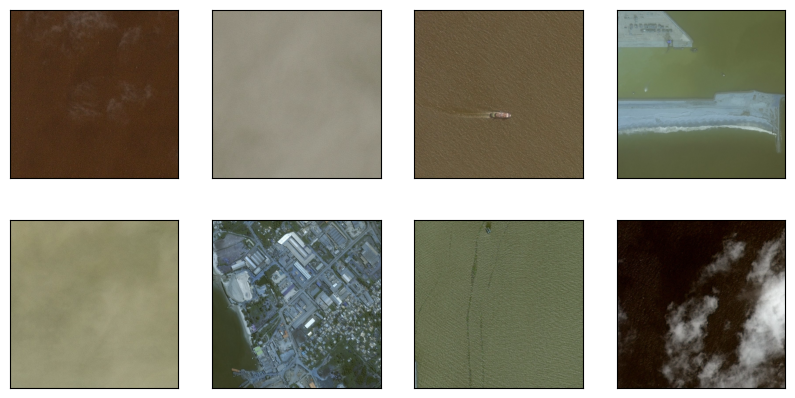

In [6]:
# plot the images
fig, axes = plt.subplots(2, 4, figsize=(10, 5))
for ax, img in zip(axes.flatten(), imgs):
    ax.imshow(img)
    ax.tick_params(
        left = False, right = False , labelleft = False, labelbottom = False, bottom = False
    )

In [7]:
# create masks dataframe from csv file
train_masks = pd.read_csv(TRAIN_MASKS)
train_masks.head(10)

,ImageId,EncodedPixels
0,00003e153.jpg,NaN
1,0001124c7.jpg,NaN
2,000155de5.jpg,264661 17 265429 33 266197 33 266965 33 267733...
3,000194a2d.jpg,360486 1 361252 4 362019 5 362785 8 363552 10 ...
4,000194a2d.jpg,51834 9 52602 9 53370 9 54138 9 54906 9 55674 ...
5,000194a2d.jpg,198320 10 199088 10 199856 10 200624 10 201392...
6,000194a2d.jpg,55683 1 56451 1 57219 1 57987 1 58755 1 59523 ...
7,000194a2d.jpg,254389 9 255157 17 255925 17 256693 17 257461 ...
8,0001b1832.jpg,NaN
9,00021ddc3.jpg,108287 1 109054 3 109821 4 110588 5 111356 5 1...


In [8]:
# null value is an empty mask

In [9]:
# check data types and null values
train_masks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231723 entries, 0 to 231722
Data columns (total 2 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   ImageId        231723 non-null  object
 1   EncodedPixels  81723 non-null   object
dtypes: object(2)
memory usage: 3.5+ MB


In [10]:
# check duplicates
train_masks.ImageId.duplicated().sum()

39167

In [11]:
# compare the number of images and masks
mask_ids = train_masks.ImageId.unique() # .unique() to deal with duplicates
print(f"Number of images: {len(train_images)}")
print(f"Number of masks: {len(mask_ids)}")

Number of images: 192554
Number of masks: 192556


In [12]:
# symmetric difference of images and masks ids
extras = set(train_images) ^ set(mask_ids)
extras

{'53018a520.jpg', 'dc441482d.jpg'}

In [13]:
for i in extras:
    print(train_masks.set_index("ImageId").loc[i])

EncodedPixels    NaN
Name: dc441482d.jpg, dtype: object
EncodedPixels    NaN
Name: 53018a520.jpg, dtype: object


In [14]:
# extras do not contain masks

In [15]:
# check the ratio of empty masks to masks with ships
n_nulls = train_masks.EncodedPixels.isnull().sum()
n_not_nulls = len(train_images) - n_nulls
print(f"Number of empy masks: {n_nulls}")
print(f"Number of masks with ships: {n_not_nulls}")
print(f"Sum: {n_not_nulls + n_nulls}")
print(f"Ratio: {n_not_nulls / n_nulls}")

Number of empy masks: 150000
Number of masks with ships: 42554
Sum: 192554
Ratio: 0.28369333333333335


In [16]:
# need to be balanced for better and faster training

In [17]:
# add the project directory to path to import the masks decoder
import sys  
sys.path.insert(0, PATH)

from rle_encode_decode import masks_to_array

In [18]:
def plot(i):
    """
    plot pair of image and mask
    """
    masks = train_masks.set_index("ImageId").loc[train_images[i]]
    mask = masks_to_array(masks)
    image = imgs[i]
    
    # print dataframe 
    print(masks)
    
    # plot image and its mask
    fig, ax = plt.subplots(1, 2, figsize=(10, 15))

    ax[0].imshow(image)
    ax[0].set_xlabel("Image")
    ax[1].imshow(mask, cmap="gray")
    ax[1].set_xlabel("Mask")

    plt.show()

EncodedPixels    NaN
Name: 0001124c7.jpg, dtype: object


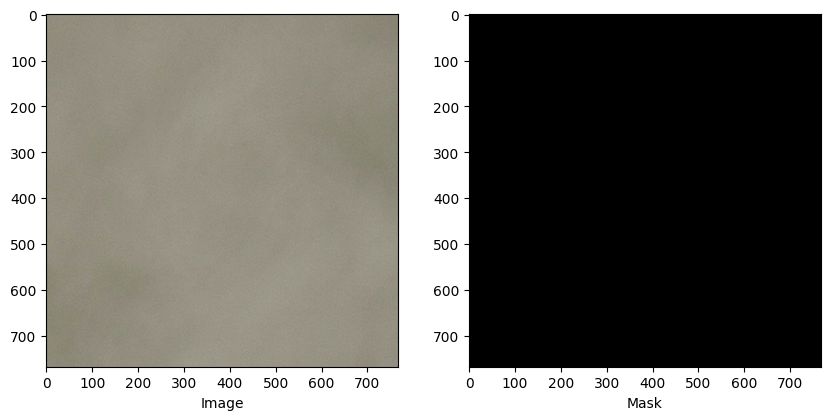

In [19]:
plot(1)

EncodedPixels    264661 17 265429 33 266197 33 266965 33 267733...
Name: 000155de5.jpg, dtype: object


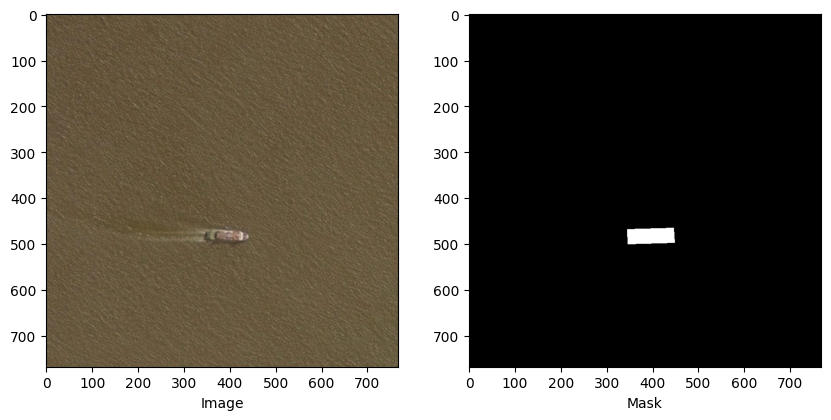

In [20]:
plot(2)

                                                   EncodedPixels
ImageId                                                         
000194a2d.jpg  360486 1 361252 4 362019 5 362785 8 363552 10 ...
000194a2d.jpg  51834 9 52602 9 53370 9 54138 9 54906 9 55674 ...
000194a2d.jpg  198320 10 199088 10 199856 10 200624 10 201392...
000194a2d.jpg  55683 1 56451 1 57219 1 57987 1 58755 1 59523 ...
000194a2d.jpg  254389 9 255157 17 255925 17 256693 17 257461 ...


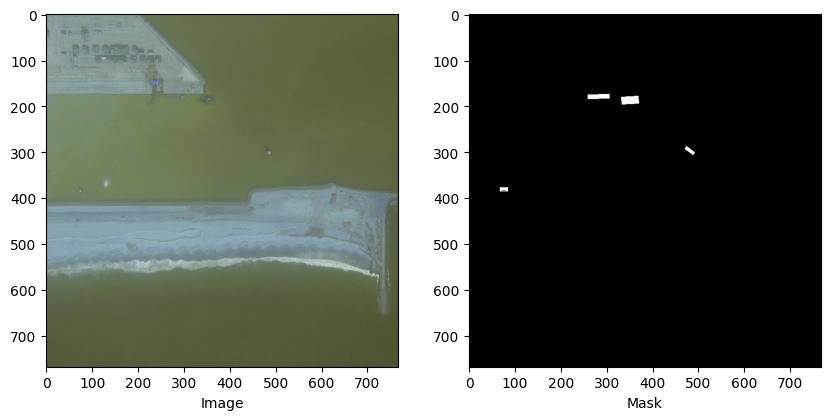

In [21]:
plot(3)

In [22]:
# get list of all test images names
test_images = os.listdir(TEST_IMGS)
# get the first 8 images as array
imgs = np.array([cv2.imread(os.path.join(TEST_IMGS, img)) for img in test_images[:8:]])

In [23]:
imgs.shape

(8, 768, 768, 3)

In [24]:
# every image has 768*768*3 shape

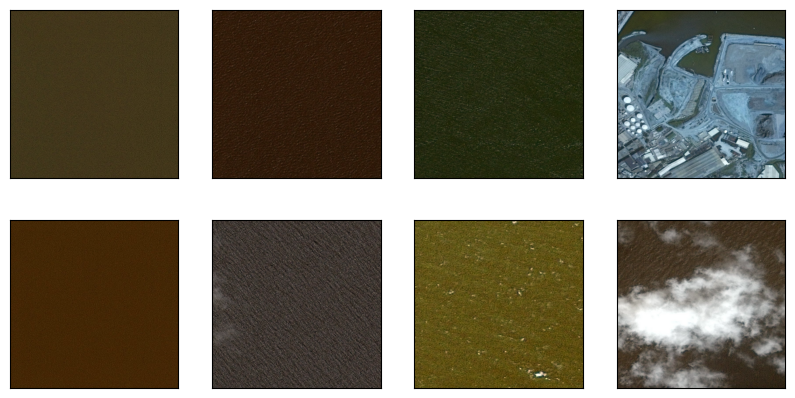

In [25]:
# plot the images
fig, axes = plt.subplots(2, 4, figsize=(10, 5))
for ax, img in zip(axes.flatten(), imgs):
    ax.imshow(img)
    ax.tick_params(
        left = False, right = False , labelleft = False, labelbottom = False, bottom = False
    )

In [26]:
# create masks dataframe from csv file
test_masks = pd.read_csv(SUBMISSION)
test_masks.head(10)

,ImageId,EncodedPixels
0,00002bd58.jpg,1 2
1,00015efb6.jpg,1 2
2,00023d5fc.jpg,1 2
3,000367c13.jpg,1 2
4,0008ca6e9.jpg,1 2
5,000a4635f.jpg,1 2
6,000bd9dbf.jpg,1 2
7,000f7d875.jpg,1 2
8,0010551d9.jpg,1 2
9,001839c6f.jpg,1 2


In [27]:
# check data types and null values
test_masks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15606 entries, 0 to 15605
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ImageId        15606 non-null  object
 1   EncodedPixels  15606 non-null  object
dtypes: object(2)
memory usage: 244.0+ KB


In [28]:
# the encoded pixels column contains blank values

In [29]:
# check duplicates
test_masks.ImageId.duplicated().sum()

0

In [30]:
# there are no duplicates

In [31]:
# compare the number of images and masks
print(f"Number of images: {len(test_images)}")
print(f"Number of masks: {len(test_masks.ImageId)}")

Number of images: 15606
Number of masks: 15606


In [32]:
# symmetric difference of images and masks ids
extras = set(test_images) ^ set(test_masks.ImageId)
extras

set()

In [33]:
# image ids are alright